In [39]:
import os
import librosa
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
import warnings
import joblib
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
warnings.filterwarnings("ignore")

In [3]:
def extract_audio_features(audio_file):
    y, sr = librosa.load(audio_file, sr=None)
    features = {}

    # Include file name extraction
    features['song_name'] = os.path.basename(audio_file)

    # Extract MFCCs and flatten
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    mfcc_mean = np.mean(mfcc, axis=1)
    for i, coeff in enumerate(mfcc_mean):
        features[f'mfcc_{i+1}'] = coeff

    # Extract tempo as a scalar
    tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
    features['tempo'] = float(tempo)  # Ensure tempo is a scalar float

    # Extract other scalar features
    features['spectral_rolloff'] = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr))
    features['chroma'] = np.mean(librosa.feature.chroma_stft(y=y, sr=sr))
    features['spectral_centroid'] = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
    features['spectral_flatness'] = np.mean(librosa.feature.spectral_flatness(y=y))

    return features


In [4]:
import os
print(os.listdir("music-data"))

['music_features.csv', 'to_map', 'music', 'test_features.csv']


In [5]:
# Path to the directory containing music files
music_dir = "music/music_files/"

# List to store all features
all_features = []

# Iterate through all files in the directory
for file in os.listdir(music_dir):
    file_path = os.path.join(music_dir, file)
    
    # Process only valid audio files
    if file.endswith(".mp3") or file.endswith(".wav"):
        print(f"Processing {file}...")
        features = extract_audio_features(file_path)
        if features:
            all_features.append(features)

# Save the extracted features to a DataFrame
df_features = pd.DataFrame(all_features)

# Save the features to a CSV file for further analysis
output_csv = "music_features.csv"
df_features.to_csv(output_csv, index=False)

print(f"Feature extraction complete! Features saved to {output_csv}")

Processing Kendrick Lamar - Not Like Us (Lyrics) Drake Diss.mp3...


/tmp/ipykernel_30/3732427608.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  features['tempo'] = float(tempo)  # Ensure tempo is a scalar float


Processing TaylorSwift-Untouchable.mp3...
Processing Robin Schulz  - Waves(Radio Edit).mp3...
Processing Olivia Rodrigo - good 4 u (Lyric Video).mp3...
Processing Arctic Monkeys - I Wanna Be Yours (Lyrics).mp3...
Processing StickSeason-NoahKahan.mp3...
Processing xeven-RollerCoaster.mp3...
Processing You Don_t Know My Name - Alicia Keys (Lyrics).mp3...
Processing Amber Run - I Found (Official Lyric Video).mp3...
Processing FKAtwigs - Eusexua.mp3...
Processing The Neighbourhood - Sweater Weather (Lyrics).mp3...
Processing Chappell Roan - Red Wine Supernova (Lyrics).mp3...
Processing The Cure - Just Like Heaven.mp3...
Processing Sade - Smooth Operator (Lyrics).mp3...
Processing Doja Cat - Addiction (Lyrics).mp3...
Processing 21 Savage - redrum (Lyrics).mp3...
Processing ABBA - Gimme! Gimme! Gimme (A Man After Midnight) - (Official Lyric Video).mp3...
Processing FrancisAndTheLights - SeeHerOut.mp3...
Processing The Weeknd - Save Your Tears (Lyrics).mp3...
Processing Un Thinkable (I_m Read

In [ ]:
df_features

In [6]:
# Path to the directory containing music files
music_dir = "to_map/to map/"

# List to store all features
all_features = []

# Iterate through all files in the directory
for file in os.listdir(music_dir):
    file_path = os.path.join(music_dir, file)
    
    # Process only valid audio files
    if file.endswith(".mp3") or file.endswith(".wav"):
        print(f"Processing {file}...")
        features = extract_audio_features(file_path)
        if features:
            all_features.append(features)

# Save the extracted features to a DataFrame
test_features = pd.DataFrame(all_features)

# Save the features to a CSV file for further analysis
output_csv = "test_features.csv"
test_features.to_csv(output_csv, index=False)

print(f"Feature extraction complete! Features saved to {output_csv}")

Processing SYML - Where_s My Love (Acoustic).mp3...


/tmp/ipykernel_30/3732427608.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  features['tempo'] = float(tempo)  # Ensure tempo is a scalar float


Processing Mackenzy Mackay - The One That You Call (Lyric Video).mp3...
Processing Le Youth And Jerro - Lost (feat. Lizzy Land).mp3...
Processing Me And U - Cassie (Lyrics).mp3...


/opt/conda/lib/python3.10/site-packages/librosa/core/pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


Processing Megan Thee Stallion - Mamushi (feat. Yuki Chiba).mp3...
Feature extraction complete! Features saved to /kaggle/working/test_features.csv


In [7]:
# Training DataFrame (df_features)
print(df_features.head())

# Test DataFrame (test_features)
print(test_features.head())

                                           song_name      mfcc_1      mfcc_2  \
0  Kendrick Lamar - Not Like Us (Lyrics) Drake Di... -163.512802  127.627892   
1                        TaylorSwift-Untouchable.mp3 -198.347534  128.867355   
2              Robin Schulz  - Waves(Radio Edit).mp3 -185.315964  140.508652   
3        Olivia Rodrigo - good 4 u (Lyric Video).mp3 -138.074402  147.490753   
4     Arctic Monkeys - I Wanna Be Yours (Lyrics).mp3 -184.750290  161.322067   

      mfcc_3     mfcc_4    mfcc_5     mfcc_6     mfcc_7     mfcc_8    mfcc_9  \
0  -0.519247  47.050537 -6.573295  35.720055  -7.721641  13.109982  3.362426   
1  -9.912684  52.873669 -4.054592  31.281782 -11.518687  19.395014 -3.059433   
2  -3.887303  43.383152  6.456966  18.958740  -2.158991   6.497024  0.715410   
3 -36.044567  35.653187 -0.352350  15.637966  -4.623144  11.308643  2.007887   
4 -11.728216  22.812147 -0.834323  12.224732  -4.750991   8.825584  7.518951   

   ...   mfcc_16   mfcc_17   mfcc_18  

In [8]:
test_set = test_features.copy()

In [9]:
# 'song_name' is the identifier column
identifier_column = 'song_name'

# For training data
train_identifiers = df_features[identifier_column]
train_features = df_features.drop(columns=[identifier_column])

# For test data
test_identifiers = test_set[identifier_column]
test_features = test_set.drop(columns=[identifier_column])


In [10]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training features and transform
scaled_train_features = scaler.fit_transform(train_features)

# Transform the test features using the same scaler
scaled_test_features = scaler.transform(test_features)

In [21]:
from sklearn.cluster import KMeans

# Define the number of clusters
num_clusters = 3
# Adjust based on your data

# Initialize and fit the KMeans model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(scaled_train_features)

# Get cluster labels for training data
train_clusters = kmeans.labels_
# Add cluster labels to the training DataFrame
df_features['cluster'] = train_clusters

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [38]:
joblib.dump(kmeans, 'kmeans_model.joblib')
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']

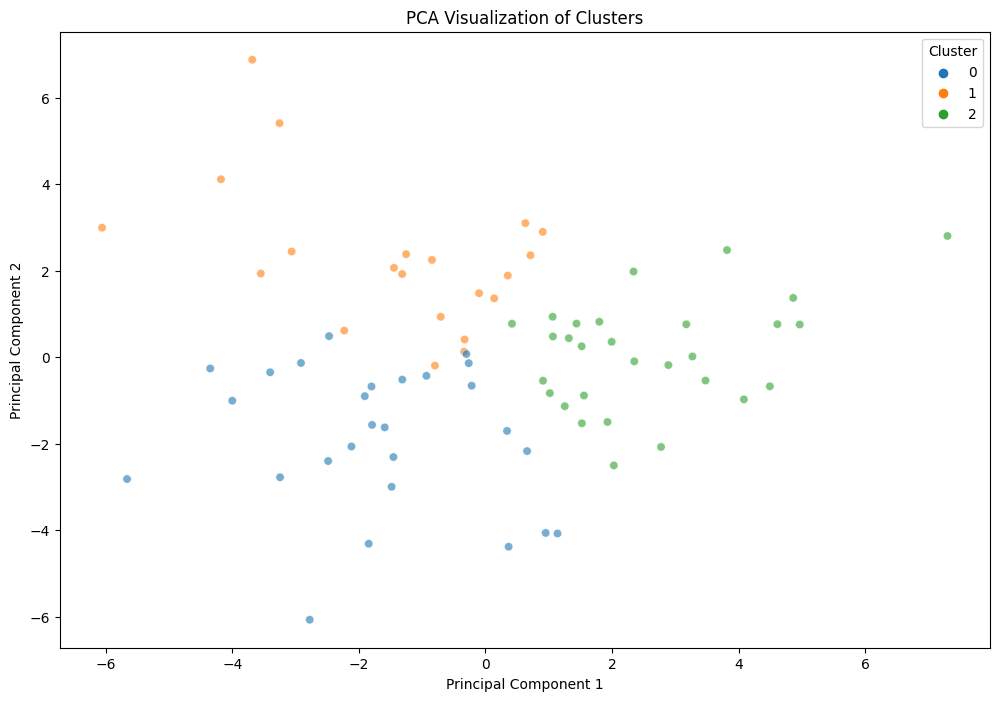

Explained variance by principal components: [0.27458663 0.19333172]
Total variance explained by the first 2 components: 46.79%


In [24]:
# Number of principal components
n_components = 2

# Perform PCA
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(scaled_train_features)

# Create a DataFrame with principal components and cluster labels
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['cluster'] = train_clusters
pca_df['song_name'] = df_features['song_name'].values

# Plot using seaborn
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=pca_df,
    x='PC1',
    y='PC2',
    hue='cluster',
    palette='tab10',
    alpha=0.6
)
plt.title('PCA Visualization of Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

# Explained variance
print(f'Explained variance by principal components: {pca.explained_variance_ratio_}')
total_variance = np.sum(pca.explained_variance_ratio_)
print(f'Total variance explained by the first {n_components} components: {total_variance:.2%}')


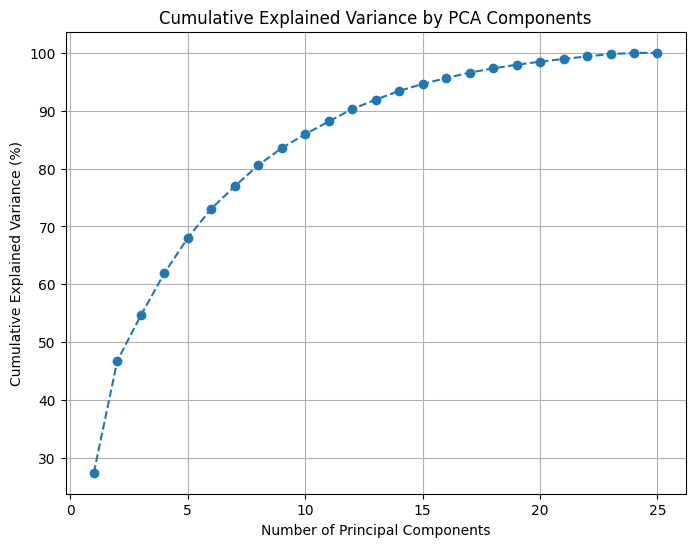

In [16]:
# Fit PCA with all components
pca = PCA()
pca.fit(scaled_train_features)

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_) * 100

# Plot cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.grid(True)
plt.show()


In [25]:
# Predict clusters for the test data
test_clusters = kmeans.predict(scaled_test_features)

# Add cluster labels to the test DataFrame
test_set['cluster'] = test_clusters

In [28]:
# Using euclidean Distances for recommendation
# Iterate over each test song
for idx, test_row in test_set.iterrows():
    test_song_name = test_row[identifier_column]
    test_cluster = test_row['cluster']
    test_feature = scaled_test_features[idx].reshape(1, -1)
    
    print(f"\nTest song '{test_song_name}' belongs to cluster {test_cluster}")
    
    # Get all training songs in the same cluster
    cluster_songs = df_features[df_features['cluster'] == test_cluster]
    cluster_features = scaled_train_features[cluster_songs.index]
    cluster_identifiers = cluster_songs[identifier_column].values
    
    # Compute distances between the test song and songs in the same cluster
    distances = euclidean_distances(test_feature, cluster_features)[0]
    
    # Create a DataFrame for recommendations
    recommendations = pd.DataFrame({
        'song_name': cluster_identifiers,
        'distance': distances
    })
    
    # Sort by distance
    recommendations = recommendations.sort_values('distance').reset_index(drop=True)
    
    print(f"Top recommendations for '{test_song_name}':")
    for i in range(min(5, len(recommendations))):  # Show top 5 recommendations
        rec_song_name = recommendations.loc[i, 'song_name']
        rec_distance = recommendations.loc[i, 'distance']
        print(f"- {rec_song_name} (Distance: {rec_distance:.4f})")



Test song 'SYML - Where_s My Love (Acoustic).mp3' belongs to cluster 1
Top recommendations for 'SYML - Where_s My Love (Acoustic).mp3':
- flora cash - You_re Somebody Else (Lyric Video).mp3 (Distance: 6.0191)
- BANKS - WaitingGame.mp3 (Distance: 6.5267)
- Daughter - Youth (Lyrics).mp3 (Distance: 6.6569)
- FrancisAndTheLights - SeeHerOut.mp3 (Distance: 6.9702)
- Kina - get you the moon (Lyrics) ft. Snow.mp3 (Distance: 7.0478)

Test song 'Mackenzy Mackay - The One That You Call (Lyric Video).mp3' belongs to cluster 1
Top recommendations for 'Mackenzy Mackay - The One That You Call (Lyric Video).mp3':
- robbyEast-trouble.mp3 (Distance: 4.1524)
- FrancisAndTheLights - SeeHerOut.mp3 (Distance: 4.4522)
- flora cash - You_re Somebody Else (Lyric Video).mp3 (Distance: 4.6498)
- Sade - Smooth Operator (Lyrics).mp3 (Distance: 5.2942)
- jungle - BackOn74.mp3 (Distance: 5.4466)

Test song 'Le Youth And Jerro - Lost (feat. Lizzy Land).mp3' belongs to cluster 1
Top recommendations for 'Le Youth And

In [27]:
test_set

,song_name,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,...,mfcc_17,mfcc_18,mfcc_19,mfcc_20,tempo,spectral_rolloff,chroma,spectral_centroid,spectral_flatness,cluster
0,SYML - Where_s My Love (Acoustic).mp3,-294.110626,177.796997,9.818043,22.375198,16.177811,13.559709,3.172787,0.885314,4.623948,...,-8.208571,-6.376565,-9.169455,-10.056717,139.674831,1888.330227,0.408515,1084.840106,0.002370,1
1,Mackenzy Mackay - The One That You Call (Lyric...,-207.565109,145.563049,14.357849,29.600491,-3.820942,23.376968,-15.329816,5.475984,-2.948551,...,-2.102364,-4.405176,-1.770284,-5.751175,99.384014,3938.367361,0.394804,1899.494695,0.044505,1
2,Le Youth And Jerro - Lost (feat. Lizzy Land).mp3,-156.257889,155.041061,-1.108428,22.830992,-20.730457,20.223160,-20.283344,3.040520,-10.510752,...,-1.290985,-7.109506,-4.251732,-4.870727,120.185320,5215.203517,0.409684,2293.053606,0.000155,1
3,Me And U - Cassie (Lyrics).mp3,-1131.370972,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000001,1
4,Megan Thee Stallion - Mamushi (feat. Yuki Chib...,-126.656822,112.170959,-6.566029,43.110428,-25.144800,24.666851,-12.213373,17.082615,-0.505036,...,6.440310,0.406868,2.301272,-1.056910,80.749512,7048.997723,0.497587,3452.776426,0.000544,2


In [37]:
# Iterate over each test song
for idx, test_row in test_set.iterrows():
    test_song_name = test_row['song_name']
    test_feature = scaled_test_features[idx].reshape(1, -1)
    test_cluster = test_row['cluster']

    print(f"\nRecommendations for Test Song '{test_song_name}' (Cluster {test_cluster}):")
    
    # Get all training songs in the same cluster
    cluster_indices = df_features[df_features['cluster'] == test_cluster].index
    cluster_songs = df_features.loc[cluster_indices]
    cluster_features = scaled_train_features[cluster_indices]
    cluster_song_names = cluster_songs['song_name'].values
    cluster_identifiers = cluster_song_names  # Alias for clarity

    # Compute similarities (higher value means more similar)
    similarities = cosine_similarity(test_feature, cluster_features)[0]


    # Create a DataFrame for recommendations
    recommendations = pd.DataFrame({
        'song_name': cluster_identifiers,
        'similarity': np.round(similarities * 100,1)
    })

    # Sort by similarity (descending)
    recommendations = recommendations.sort_values('similarity', ascending=False).reset_index(drop=True)

    # Display top recommendations
    print(f"Top recommendations for '{test_song_name}':")
    for i in range(min(5, len(recommendations))):
        rec_song_name = recommendations.loc[i, 'song_name']
        rec_similarity = recommendations.loc[i, 'similarity']
        print(f"- {rec_song_name} (Similarity: {rec_similarity:.1f}%)")



Recommendations for Test Song 'SYML - Where_s My Love (Acoustic).mp3' (Cluster 1):
Top recommendations for 'SYML - Where_s My Love (Acoustic).mp3':
- flora cash - You_re Somebody Else (Lyric Video).mp3 (Similarity: 77.8%)
- BANKS - WaitingGame.mp3 (Similarity: 77.3%)
- FrancisAndTheLights - SeeHerOut.mp3 (Similarity: 73.1%)
- Kina - get you the moon (Lyrics) ft. Snow.mp3 (Similarity: 72.7%)
- Daughter - Youth (Lyrics).mp3 (Similarity: 72.4%)

Recommendations for Test Song 'Mackenzy Mackay - The One That You Call (Lyric Video).mp3' (Cluster 1):
Top recommendations for 'Mackenzy Mackay - The One That You Call (Lyric Video).mp3':
- flora cash - You_re Somebody Else (Lyric Video).mp3 (Similarity: 77.6%)
- blackbear - idfc (Lyrics).mp3 (Similarity: 76.8%)
- Daughter - Youth (Lyrics).mp3 (Similarity: 70.9%)
- robbyEast-trouble.mp3 (Similarity: 63.5%)
- Kina - get you the moon (Lyrics) ft. Snow.mp3 (Similarity: 61.8%)

Recommendations for Test Song 'Le Youth And Jerro - Lost (feat. Lizzy Lan